In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
import zipfile

In [2]:
import zipfile
import pandas as pd
import os

zip_file_path = r"C:\Users\rames\Downloads\mnist.zip"
output_dir_path = r"C:\Users\rames\Downloads\mnist_extracted"

def unzip(zip_file_path, output_dir_path):
    """
    Unzips the specified zip file into the specified directory.
    
    Parameters:
    zip_file_path (str): The path to the zip file.
    output_dir_path (str): The directory where the contents will be extracted.
    """
    print(f"Unzipping {zip_file_path} to {output_dir_path}...")
    with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
        zip_ref.extractall(output_dir_path)
    print("Data uncompressed successfully...")

def read_image_files(output_dir_path):
    """
    Reads all image files from the specified directory using os.walk and returns
    a list of dictionaries. Each dictionary contains the file name and its path.
    
    Parameters:
    output_dir_path (str): The directory to search for image files.
    
    Returns:
    list: A list of dictionaries with file name and path.
    """
    files_data = []
    print(f"Searching for image files in {output_dir_path}...")
    for root, dirs, files in os.walk(output_dir_path):
        print(f"Reading image files from {root}... Detected {len(files)} files in {root} directory.")
        for file_name in files:
            if file_name.lower().endswith((".png", ".jpg", ".jpeg", ".gif", ".bmp")):
                file_path = os.path.join(root, file_name)
                print(f"Processing file: {file_path}")
                files_data.append({"file_name": file_name, "file_path": file_path})
    if not files_data:
        print("No image files found.")
    return files_data

def load_into_df(files_data):
    """
    Loads the list of dictionaries into a pandas DataFrame.
    
    Parameters:
    files_data (list): The list of dictionaries to load into the DataFrame.
    
    Returns:
    DataFrame: The resulting pandas DataFrame.
    """
    if files_data:
        df = pd.DataFrame(files_data)
        print("DataFrame created successfully.")
    else:
        df = pd.DataFrame()
        print("No image files found, empty DataFrame created.")
    return df

unzip(zip_file_path, output_dir_path)
files_data = read_image_files(output_dir_path)
print(f"Total image files processed: {len(files_data)}")
df = load_into_df(files_data)
print(df)

Unzipping C:\Users\rames\Downloads\mnist.zip to C:\Users\rames\Downloads\mnist_extracted...
Data uncompressed successfully...
Searching for image files in C:\Users\rames\Downloads\mnist_extracted...
Reading image files from C:\Users\rames\Downloads\mnist_extracted... Detected 0 files in C:\Users\rames\Downloads\mnist_extracted directory.
Reading image files from C:\Users\rames\Downloads\mnist_extracted\New folder... Detected 0 files in C:\Users\rames\Downloads\mnist_extracted\New folder directory.
Reading image files from C:\Users\rames\Downloads\mnist_extracted\New folder\A... Detected 13870 files in C:\Users\rames\Downloads\mnist_extracted\New folder\A directory.
Processing file: C:\Users\rames\Downloads\mnist_extracted\New folder\A\A-0.png
Processing file: C:\Users\rames\Downloads\mnist_extracted\New folder\A\A-1.png
Processing file: C:\Users\rames\Downloads\mnist_extracted\New folder\A\A-10.png
Processing file: C:\Users\rames\Downloads\mnist_extracted\New folder\A\A-100.png
Process

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Processing file: C:\Users\rames\Downloads\mnist_extracted\New folder\T\T-7489.png
Processing file: C:\Users\rames\Downloads\mnist_extracted\New folder\T\T-749.png
Processing file: C:\Users\rames\Downloads\mnist_extracted\New folder\T\T-7490.png
Processing file: C:\Users\rames\Downloads\mnist_extracted\New folder\T\T-7491.png
Processing file: C:\Users\rames\Downloads\mnist_extracted\New folder\T\T-7492.png
Processing file: C:\Users\rames\Downloads\mnist_extracted\New folder\T\T-7493.png
Processing file: C:\Users\rames\Downloads\mnist_extracted\New folder\T\T-7494.png
Processing file: C:\Users\rames\Downloads\mnist_extracted\New folder\T\T-7495.png
Processing file: C:\Users\rames\Downloads\mnist_extracted\New folder\T\T-7496.png
Processing file: C:\Users\rames\Downloads\mnist_extracted\New folder\T\T-7497.png
Processing file: C:\Users\rames\Downloads\mnist_extracted\New folder\T\T-7498.png
Processing file: C:\Users\rames\Downloads\mnist_extracted\New folder\T\T-7499.png
Processing file: 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



DataFrame created successfully.
         file_name                                          file_path
0          A-0.png  C:\Users\rames\Downloads\mnist_extracted\New f...
1          A-1.png  C:\Users\rames\Downloads\mnist_extracted\New f...
2         A-10.png  C:\Users\rames\Downloads\mnist_extracted\New f...
3        A-100.png  C:\Users\rames\Downloads\mnist_extracted\New f...
4       A-1000.png  C:\Users\rames\Downloads\mnist_extracted\New f...
...            ...                                                ...
372446   Z-995.png  C:\Users\rames\Downloads\mnist_extracted\New f...
372447   Z-996.png  C:\Users\rames\Downloads\mnist_extracted\New f...
372448   Z-997.png  C:\Users\rames\Downloads\mnist_extracted\New f...
372449   Z-998.png  C:\Users\rames\Downloads\mnist_extracted\New f...
372450   Z-999.png  C:\Users\rames\Downloads\mnist_extracted\New f...

[372451 rows x 2 columns]


In [3]:
path = r"C:\Users\rames\Downloads\mnist_extracted\New folder"

In [4]:
def vectorize_image_files(path):
    image_vectors = []
    image_labels = []
    # Get the list of folder names (labels)
    labels = [dir_name for dir_name in os.listdir(path) if os.path.isdir(os.path.join(path, dir_name))]
    for label in labels:
        label_dir = os.path.join(path, label)
        # Ensure the directory exists
        if os.path.isdir(label_dir):
            # Iterate through each image in the directory
            for image_file in os.listdir(label_dir):
                image_file_path = os.path.join(label_dir, image_file)
                with Image.open(image_file_path) as img:
                    #### Vectorize ####
                    img_arr = np.array(img)
                    image_vector = img_arr.ravel()
                    ###################
                    image_vectors.append(image_vector)
                    image_labels.append(label)
    return image_vectors, image_labels


def load_vectors_into_df(image_vectors, image_labels):
    df = pd.DataFrame(image_vectors, columns=[f"pixel_{i}" for i in range(len(image_vectors[0]))])
    df['labels'] = image_labels
    return df

## Step-1: Load the DataSet

In [9]:
image_vectors, image_labels = vectorize_image_files(path)

image_df = load_vectors_into_df(image_vectors, image_labels)

image_df.head()

pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel_8  pixel_9  ...  pixel_775  pixel_776  pixel_777  pixel_778  \
0        0        0  ...          0          0          0          0   
1        0        0  ...          0          0          0          0   
2        0        0  ...          0          0          0          0   
3        0        0  ...          0          0          0          0   
4        0        0  ...          0          0          0          0   

   pixel_779  pixel_780  pixel_781  pixel_782  pixel_783  labels  
0          0          0          0          0          0       A  
1          0          0          0          0          0       A  
2          0          0          0          0          0       A  
3          0          0          0          0          0       A  
4          0          0          0          0          0       A  

[5 rows x 785 columns]

## Step-2: Explore the Analysis

In [10]:
len(image_df['labels'].value_counts())

26

<Axes: xlabel='labels', ylabel='count'>

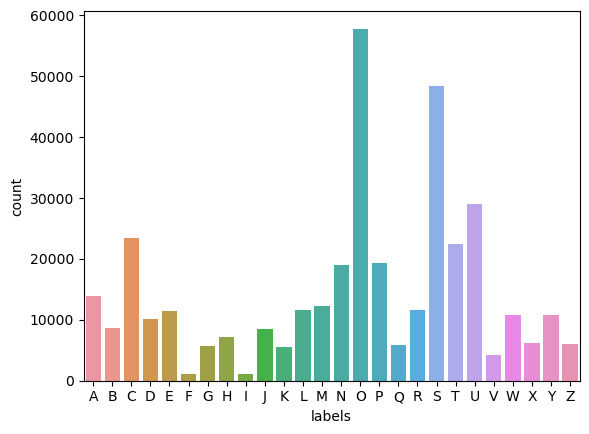

In [11]:
sns.countplot(data = image_df,x = image_df['labels'])

In [12]:
image_df.shape

(372451, 785)

Randomly Generated index: 38730
Label of image at 38730 index: C

Data Type of Image Array: object
Image Array:
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 65 131 202 255 255 225 95 4 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 11 176 255 255 255 255 255 255 255 216 20 0 0 0 0
  0 0]
 [0 0 0 0 0 0 0 0 0 5 60 239 255 255 255 255 255 255 255 255 255 105 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 6 150 255 255 255 255 254 159 106 129 248 255 255 215
  14 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 135 255 255 255 242 224 95 0 0 0 167 255 255 255 24 0 0
  0 0 0]
 [0 0 0 0 0 0 5 61 228 255 255 176 53 0 0 0 0 0 61 255 255 255 24 0 0 0 0
  0]
 [0 0 0 0 0 0 57 255 255 255 178 12 0 0 0 0 0 0 141 255 255 191 8 0 0 0 0
  0]
 [0 0 0 0 0 40 224 255 255 205 15 0 0 0 0 0 0 0 147 243 255 75 0 0 0 0 0
  0]
 [0 0 0 

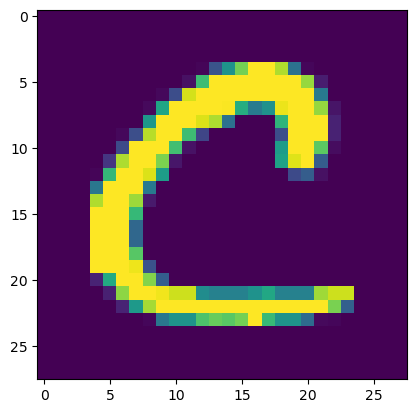

In [13]:
idx = np.random.randint(0, 372451)

print("Randomly Generated index:", idx)

print(f"Label of image at {idx} index:", image_df.iloc[idx, -1])
print()

img = np.reshape(image_df.iloc[idx, 0:-1], (28,28))
print("Data Type of Image Array:", img.dtype)
print("Image Array:\n", img)

img = img.astype("float")

plt.imshow(img)

## Step-3: seggerate the input and output

In [14]:
image_df.columns

Index(['pixel_0', 'pixel_1', 'pixel_2', 'pixel_3', 'pixel_4', 'pixel_5',
       'pixel_6', 'pixel_7', 'pixel_8', 'pixel_9',
       ...
       'pixel_775', 'pixel_776', 'pixel_777', 'pixel_778', 'pixel_779',
       'pixel_780', 'pixel_781', 'pixel_782', 'pixel_783', 'labels'],
      dtype='object', length=785)

In [15]:
x = image_df.drop(columns='labels')

In [16]:
y = image_df[['labels']]

## step-4: Split the Train and Test

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

In [20]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(260715, 784) (111736, 784)
(260715, 1) (111736, 1)


## Step-5: Data Preparation on Train Data and Test Data

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scalar = MinMaxScaler()

In [28]:
x_train_transformed = pd.DataFrame(scalar.fit_transform(x_train),
                                  columns=scalar.get_feature_names_out(),
                                  index = x_train.index)

In [30]:
x_train_transformed.shape

(260715, 784)

In [31]:
x_train_transformed.head()

pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  \
138377      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
148612      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
41756       0.0      0.0      0.0      0.0      0.0      0.0      0.0   
308088      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
361826      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel_7  pixel_8  pixel_9  ...  pixel_774  pixel_775  pixel_776  \
138377      0.0      0.0      0.0  ...        0.0        0.0        0.0   
148612      0.0      0.0      0.0  ...        0.0        0.0        0.0   
41756       0.0      0.0      0.0  ...        0.0        0.0        0.0   
308088      0.0      0.0      0.0  ...        0.0        0.0        0.0   
361826      0.0      0.0      0.0  ...        0.0        0.0        0.0   

        pixel_777  pixel_778  pixel_779  pixel_780  pixel_781  pixel_782  \
138377        0.0        0.0        0.0        0.0        0.0        0.0   
148612        0.0        0.0        0.0        0.0        0.0        0.0   
41756         0.0        0.0        0.0        0.0        0.0        0.0   
308088        0.0        0.0        0.0        0.0        0.0        0.0   
361826        0.0        0.0        0.0        0.0        0.0        0.0   

        pixel_783  
138377        0.0  
148612        0.0  
41756         0.0  
308088        0.0  
361826        0.0  

[5 rows x 784 columns]

In [33]:
x_test_transformed = pd.DataFrame(scalar.transform(x_test),
                                 columns=scalar.get_feature_names_out(),
                                 index = x_test.index)

In [34]:
x_test_transformed.shape

(111736, 784)

In [35]:
x_test_transformed.head()

pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  \
186272      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
315826      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
63893       0.0      0.0      0.0      0.0      0.0      0.0      0.0   
264949      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
224093      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel_7  pixel_8  pixel_9  ...  pixel_774  pixel_775  pixel_776  \
186272      0.0      0.0      0.0  ...        0.0        0.0        0.0   
315826      0.0      0.0      0.0  ...        0.0        0.0        0.0   
63893       0.0      0.0      0.0  ...        0.0        0.0        0.0   
264949      0.0      0.0      0.0  ...        0.0        0.0        0.0   
224093      0.0      0.0      0.0  ...        0.0        0.0        0.0   

        pixel_777  pixel_778  pixel_779  pixel_780  pixel_781  pixel_782  \
186272        0.0        0.0        0.0        0.0        0.0        0.0   
315826        0.0        0.0        0.0        0.0        0.0        0.0   
63893         0.0        0.0        0.0        0.0        0.0        0.0   
264949        0.0        0.0        0.0        0.0        0.0        0.0   
224093        0.0        0.0        0.0        0.0        0.0        0.0   

        pixel_783  
186272        0.0  
315826        0.0  
63893         0.0  
264949        0.0  
224093        0.0  

[5 rows x 784 columns]

## Step-6,8,9 : Training and Test Phase

### Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
tree = DecisionTreeClassifier()

In [40]:
tree.fit(x_train_transformed,y_train)

DecisionTreeClassifier()

In [42]:
y_pred = tree.predict(x_test_transformed)

In [43]:
from sklearn import metrics

In [44]:
a = metrics.accuracy_score(y_pred,y_test)

In [45]:
a

0.9393302069163028

## Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
forest = RandomForestClassifier()

In [48]:
forest.fit(x_train_transformed,y_train)

C:\Users\rames\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [49]:
y_pred1 = forest.predict(x_test_transformed)

In [50]:
b = metrics.accuracy_score(y_pred1,y_test)

In [51]:
b

0.9833446695782917

## Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
reg = LogisticRegression()

In [55]:
reg.fit(x_train_transformed,y_train)

C:\Users\rames\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rames\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
y_pred2 = reg.predict(x_test_transformed)

In [58]:
c = metrics.accuracy_score(y_pred2,y_test)

In [59]:
c

0.8791884441898762

In [2]:
a = 0.9393302069163028
b = 0.9833446695782917
c = 0.8791884441898762

In [3]:
algorithms = ["Decision Tree","Random Forest","Logistic Regression"]

In [4]:
accuracy_score = [a,b,c]

<Axes: >

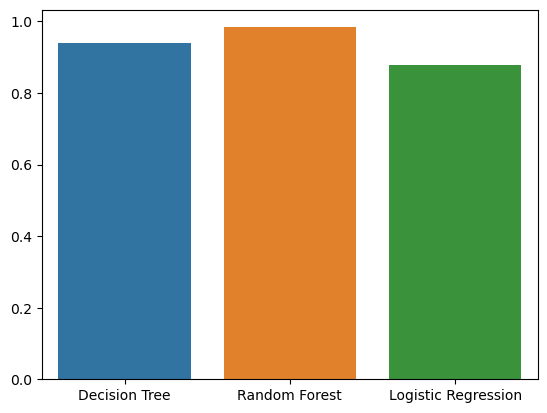

In [5]:
sns.barplot(x = algorithms,y=accuracy_score,palette="tab10")